<a href="https://colab.research.google.com/github/KacperKaszuba0608/ML_projects/blob/main/Predicting_Employee_Productivity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1>Predicting Employee Productivity Using Tree Models</h1></center>

In this guided project I will analyze the dataset about *Productivity Prediction of Garment Employees* from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/597/productivity+prediction+of+garment+employees). The original description of the dataset is below:

    The Garment Industry is one of the key examples of the industrial globalization of this modern era. It is a highly labour-intensive industry with lots of manual processes. Satisfying the huge global demand for garment products is mostly dependent on the production and delivery performance of the employees in the garment manufacturing companies.
    
    So, it is highly desirable among the decision makers in the garments industry to track, analyse and predict the productivity performance of the working teams in their factories.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reading in the data
df = pd.read_csv('https://dq-content.s3.amazonaws.com/755/garments_worker_productivity.csv')
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


## Dataset Exploration

In [3]:
df.shape

(1197, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

The dataset contains 15 columns and almost 1200 rows. Most of potential features are number type and first four are the object type. Unfortunately one column (`wip`) has many missing values. The following list is the dataset's official column information:
* `date`: date in MM-DD-YYYY
* `quarter`: a portion of the month — month was divided into four quarters
* `department`: associated department with the instance
* `day`: day of the week
* `team`: associated team number with the instance
* `targeted_productivity`: targeted productivity set by the authority for each team for each day
* `smv`: standard minute value — the allocated time for a task
* `wip`: work in progress — includes the number of unfinished items for products
* `over_time`: represents the amount of overtime by each team in minutes
* `incentive`: represents the amount of financial incentive (in BDT) that enables or motivates a particular course of action
* `idle_time`: the duration of time when the production was interrupted due to several reasons
* `idle_men`: the number of workers who were idle due to production interruption
* `no_of_style_change`: number of changes in the style of a particular product
* `no_of_workers`: number of workers on each team
* `actual_productivity`: the actual % of productivity that was delivered by the workers — it ranges from 0 to 1.

In [5]:
df.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


<ipython-input-6-0af27b83d63a>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax=ax)


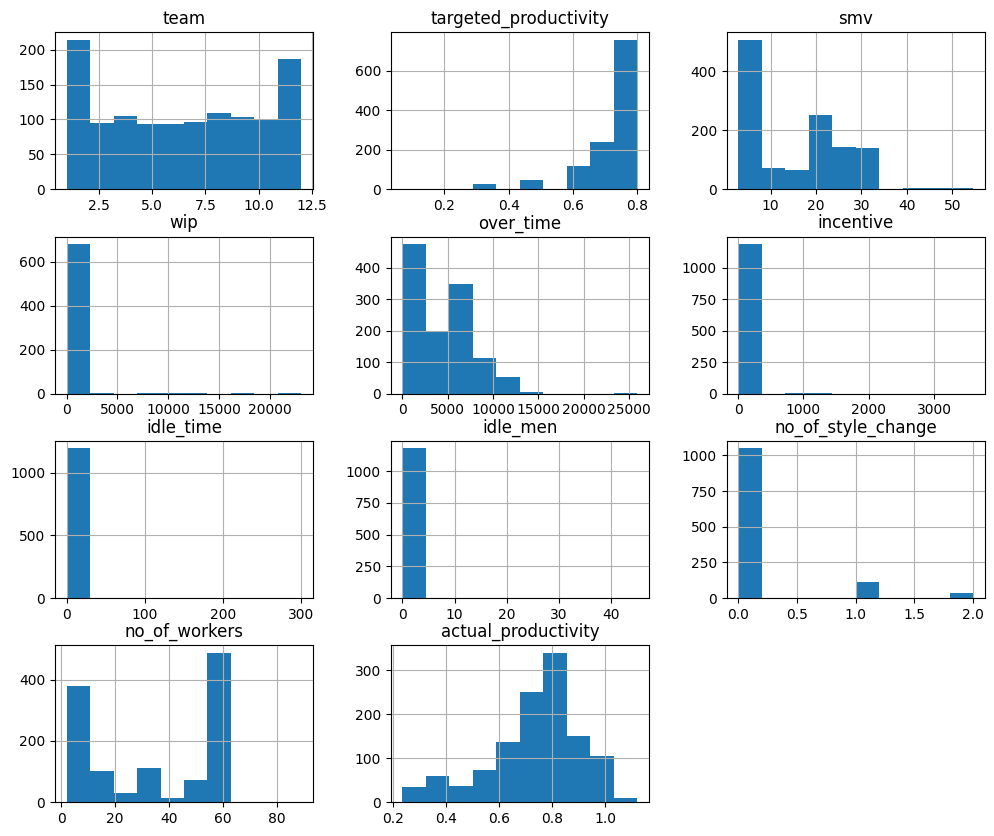

In [6]:
# plotting the distribution of features
fig, ax = plt.subplots(figsize=(12,10))
df.hist(ax=ax)
plt.show()

Histograms show us that some features like `incentive`, `idle_time`, `idle_men`, `no_of_style_change` and `wip` are uniform - means most values are the same. Because of that we decided to take a closer look to each column.

### `date` Column

As we can see below, this column contain dates from 1st January to 3rd November. Closely related to this column is the 'quarter' column, which gives more information because, as mentioned earlier, it divides the month into four parts. Because of that we can drop `date` column without questions.

In [7]:
df['date'].head()

0    1/1/2015
1    1/1/2015
2    1/1/2015
3    1/1/2015
4    1/1/2015
Name: date, dtype: object

In [8]:
df['date'].tail()

1192    3/11/2015
1193    3/11/2015
1194    3/11/2015
1195    3/11/2015
1196    3/11/2015
Name: date, dtype: object

### `quarter` Column

This column is object type which means we had to count the values. The description said that analysed column should contain only 4 quarters and we can see below that it contains five type of quarters.

In [9]:
# counting values for quarter column
df['quarter'].value_counts()

quarter
Quarter1    360
Quarter2    335
Quarter4    248
Quarter3    210
Quarter5     44
Name: count, dtype: int64

In [10]:
# extracting unique values
df.loc[df['quarter'] == 'Quarter5', 'date'].unique()

array(['1/29/2015', '1/31/2015'], dtype=object)

As we can see the `Quarter5` contains only two dates and those dates should be included into 4th quarter of the month.

### `department` Column

The results of the value counts is interestin, because we can see `finishing` two times in the summary. Why? Probably one of them contains white space.

In [11]:
# counting values for department column
df['department'].value_counts()

department
sweing        691
finishing     257
finishing     249
Name: count, dtype: int64

In [12]:
# extracting unique values
df['department'].unique()

array(['sweing', 'finishing ', 'finishing'], dtype=object)

As we can see one of them contains space after the word.

### `day` Column

This column looks good, we need to encode the days of the week with the number. Interesting is that we don't have values for friday.

In [13]:
# counting values for day column
df['day'].value_counts()

day
Wednesday    208
Sunday       203
Tuesday      201
Thursday     199
Monday       199
Saturday     187
Name: count, dtype: int64

### `team` Column

As we can see the column contains 12 teams in `int` type, so this column is ready to use it in decision trees.

In [14]:
# counting values for team column
df['team'].value_counts()

team
8     109
2     109
1     105
4     105
9     104
10    100
12     99
7      96
3      95
6      94
5      93
11     88
Name: count, dtype: int64

### `trageted_productivity` Column

Based on the summary of the column, we can say that everything is fine, the range of the values doesn't look strange and most of the values are higher than 0.70.

In [15]:
# calculating the basic statistics for targeted_productivity column
df['targeted_productivity'].describe()

count    1197.000000
mean        0.729632
std         0.097891
min         0.070000
25%         0.700000
50%         0.750000
75%         0.800000
max         0.800000
Name: targeted_productivity, dtype: float64

Right now, we can also compare targeted productivity with actual productivity. It's give us the insight into how teams work.

In [16]:
df[df['targeted_productivity'] == df['actual_productivity']]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
163,1/10/2015,Quarter2,sweing,Saturday,10,0.8,28.08,1082.0,10530,63,0.0,0,0,58.5,0.8
182,1/11/2015,Quarter2,sweing,Sunday,2,0.8,28.08,805.0,10530,63,0.0,0,0,58.5,0.8
183,1/11/2015,Quarter2,sweing,Sunday,10,0.8,28.08,762.0,10530,38,0.0,0,0,58.5,0.8
207,1/12/2015,Quarter2,sweing,Monday,2,0.8,28.08,737.0,10530,63,0.0,0,0,58.5,0.8
229,1/13/2015,Quarter2,sweing,Tuesday,2,0.8,28.08,723.0,10530,50,0.0,0,0,58.5,0.8
855,2/19/2015,Quarter3,sweing,Thursday,8,0.7,29.40,1116.0,6240,0,0.0,0,2,57.0,0.7


In [17]:
len(df[df['targeted_productivity'] == df['actual_productivity']])

6

As we can see, it's only 6 times when the targeted productivity was equal to actual productivity.

In [18]:
len(df[df['targeted_productivity'] > df['actual_productivity']])

322

322 times the actual productivity was lesser than targeted productivity.

In [19]:
len(df[df['targeted_productivity'] < df['actual_productivity']])

869

In fact, actual productivity was up to 869 times higher than the productivity target.

### `smv` Column

The summary of this column looks good, the values range from 0 to 60, so we can move on.

In [20]:
# calculating the basic statistics for smv column
df['smv'].describe()

count    1197.000000
mean       15.062172
std        10.943219
min         2.900000
25%         3.940000
50%        15.260000
75%        24.260000
max        54.560000
Name: smv, dtype: float64

### `wip` Column

There are many missing values in this column, and those that are not missing are very uniform and not very informative.

In [21]:
# calculating the basic statistics for wip column
df['wip'].describe()

count      691.000000
mean      1190.465991
std       1837.455001
min          7.000000
25%        774.500000
50%       1039.000000
75%       1252.500000
max      23122.000000
Name: wip, dtype: float64

The describe method shows us that this column also has a wide spread range of values - from 7 to 23122. It doesn't look good because the number of 23122 unfinished work is impossible. Therefore, we can safely remove this column.

### `over_time` Column

Having summarised this column, we can say that each team has a lot of overtime. Now we should look at the thresholds that tell us how many times the overtime is very high. This time the best threshold should be the median, which is 3960.

In [22]:
# calculating the basic statistics for over_time column
df['over_time'].describe()

count     1197.000000
mean      4567.460317
std       3348.823563
min          0.000000
25%       1440.000000
50%       3960.000000
75%       6960.000000
max      25920.000000
Name: over_time, dtype: float64

In [23]:
# counting the number of the overtime over the median
len(df[df['over_time'] > 3960])

597

As we can see this is very common situation. One thing can be interesting. How many times there wasn't overtime and the actual productivity was higer then targeted?

In [24]:
len(df[(df['over_time'] == 0) & (df['actual_productivity'] > df['targeted_productivity'])])

24

Only 24 times. It seams to be very rare situation.

### `incentive` Column

The summary of this column looks good and as we can see most of the teams don't get the financial incentive.

In [25]:
# calculating the basic statistics for incentive column
df['incentive'].describe()

count    1197.000000
mean       38.210526
std       160.182643
min         0.000000
25%         0.000000
50%         0.000000
75%        50.000000
max      3600.000000
Name: incentive, dtype: float64

### `idle_time` & `idle_mean` Columns

This two columns are related to each other, so we decide to analyse them together.

In [26]:
# calculating the basic statistics for idle_time column
df['idle_time'].describe()

count    1197.000000
mean        0.730159
std        12.709757
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       300.000000
Name: idle_time, dtype: float64

In [27]:
len(df[df['idle_time'] == 0])

1179

In [28]:
# calculating the basic statistics for idle_men column
df['idle_men'].describe()

count    1197.000000
mean        0.369256
std         3.268987
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        45.000000
Name: idle_men, dtype: float64

In [29]:
len(df[df['idle_men'] == 0])

1179

As we can see, the most common value in both columns is 0, even the 3rd quantile is 0. In addition, there are only 16 values other than 0. This suggests that we should drop this column, but let's compare them together. First of all, let's see if there is an event where production was not interrupted by workers.

In [30]:
df[(df['idle_time'] > 0) & (df['idle_men'] == 0)]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity


The results show us that in every case the reason of the production interruption was a worker. In this case we should remove both column, because the are not inforamtive enough.

### `no_of_style_change` Column

The earlier histogram and the value counts below show us, that most of values are 0. If the style of a particular product doesn't change often, we can't use this column because it's not informative enough.

In [31]:
# counting values for no_of_style_change column
df['no_of_style_change'].value_counts()

no_of_style_change
0    1050
1     114
2      33
Name: count, dtype: int64

### `no_of_workers` Column

The results of the analyse of this column show us, that there is not missing or incorrect data. The range of the data is wide (from 2 to 89). The most common number of workers in the team is 34 and the 3rd quantile is 57.

In [32]:
# calculating the basic statistics for no_of_workers column
df['no_of_workers'].describe()

count    1197.000000
mean       34.609858
std        22.197687
min         2.000000
25%         9.000000
50%        34.000000
75%        57.000000
max        89.000000
Name: no_of_workers, dtype: float64

### `actual_productivity` Column

The description of the column tell us that values have range from 0 to 1. The summary of basic statistic below shows us that this column has values over 1.

In [33]:
df['actual_productivity'].describe()

count    1197.000000
mean        0.735091
std         0.174488
min         0.233705
25%         0.650307
50%         0.773333
75%         0.850253
max         1.120437
Name: actual_productivity, dtype: float64

How many observations have the actual productivity over 1?

In [34]:
len(df[df['actual_productivity'] > 1])

37

There are 37 observations meeting this criterion.

## Data Cleaning and Preprocessing

First of all we remove column which we discus earlier (`date`, `wip`, `idle_time`, `idle_men`, `no_of_style_change`).

In [35]:
df_clean = df.copy()

In [36]:
# removing unnecessary columns
df_clean = df_clean.drop(['date', 'wip', 'idle_time', 'idle_men', 'no_of_style_change'], axis=1)
df_clean.head()

,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,no_of_workers,actual_productivity
0,Quarter1,sweing,Thursday,8,0.80,26.16,7080,98,59.0,0.940725
1,Quarter1,finishing,Thursday,1,0.75,3.94,960,0,8.0,0.886500
2,Quarter1,sweing,Thursday,11,0.80,11.41,3660,50,30.5,0.800570
3,Quarter1,sweing,Thursday,12,0.80,11.41,3660,50,30.5,0.800570
4,Quarter1,sweing,Thursday,6,0.80,25.90,1920,50,56.0,0.800382


Now we can work with the rest of columns.

### `quarter` Column

As we remember there was the extra part of the month called `Quarter5` and it contains only two dates `1/29/2015` and `1/31/2015`. We will change the quarter 5 to quarter 4 and then enocde them into integers amd finally convert to dummy variables, because we have more than two classes in column.

In [37]:
# changing the values from "Quarter5" to "Quarter4"
df_clean.loc[df['quarter'] == 'Quarter5', 'quarter'] = 'Quarter4'
df_clean['quarter'].value_counts()

quarter
Quarter1    360
Quarter2    335
Quarter4    292
Quarter3    210
Name: count, dtype: int64

In [38]:
from sklearn.preprocessing import OrdinalEncoder

# encoding the quarter column with OrdinalEncoder
quarter_order = [['Quarter1', 'Quarter2', 'Quarter3', 'Quarter4']]

df_clean['quarter'] = OrdinalEncoder(categories=quarter_order).fit_transform(df_clean[['quarter']])
df_clean['quarter'] = df_clean['quarter'].astype('int')
df_clean['quarter'].value_counts()

quarter
0    360
1    335
3    292
2    210
Name: count, dtype: int64

In [39]:
# creating dummy variables for the quarter column
df_clean = pd.get_dummies(df_clean, columns=['quarter'], prefix='q')
df_clean.head()

,department,day,team,targeted_productivity,smv,over_time,incentive,no_of_workers,actual_productivity,q_0,q_1,q_2,q_3
0,sweing,Thursday,8,0.80,26.16,7080,98,59.0,0.940725,True,False,False,False
1,finishing,Thursday,1,0.75,3.94,960,0,8.0,0.886500,True,False,False,False
2,sweing,Thursday,11,0.80,11.41,3660,50,30.5,0.800570,True,False,False,False
3,sweing,Thursday,12,0.80,11.41,3660,50,30.5,0.800570,True,False,False,False
4,sweing,Thursday,6,0.80,25.90,1920,50,56.0,0.800382,True,False,False,False


### `department` Column

This column contains white spaces after the "finishing" word, so we have to remove this white spaces.

In [40]:
# removing white spaces from the department column
df_clean['department'] = df_clean['department'].apply(lambda x: x.strip())
df_clean['department'].value_counts()

department
sweing       691
finishing    506
Name: count, dtype: int64

Now we can rename column to `dept_sweing` and encode values, where `0`: `finishing` and `1`: `sweing`.

In [41]:
# One-hot-encoding of the department column
df_clean['department'].replace({'finishing':0, 'sweing':1}, inplace=True)
df_clean.rename(columns = {'department':'dept_sweing'}, inplace=True)
df_clean.head()

,dept_sweing,day,team,targeted_productivity,smv,over_time,incentive,no_of_workers,actual_productivity,q_0,q_1,q_2,q_3
0,1,Thursday,8,0.80,26.16,7080,98,59.0,0.940725,True,False,False,False
1,0,Thursday,1,0.75,3.94,960,0,8.0,0.886500,True,False,False,False
2,1,Thursday,11,0.80,11.41,3660,50,30.5,0.800570,True,False,False,False
3,1,Thursday,12,0.80,11.41,3660,50,30.5,0.800570,True,False,False,False
4,1,Thursday,6,0.80,25.90,1920,50,56.0,0.800382,True,False,False,False


### `day` Column

We only have to create a dummy variables.

In [42]:
# creating dummy variables for the day column
df_clean = pd.get_dummies(df_clean, columns=['day'])
df_clean.head()

,dept_sweing,team,targeted_productivity,smv,over_time,incentive,no_of_workers,actual_productivity,q_0,q_1,q_2,q_3,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
0,1,8,0.80,26.16,7080,98,59.0,0.940725,True,False,False,False,False,False,False,True,False,False
1,0,1,0.75,3.94,960,0,8.0,0.886500,True,False,False,False,False,False,False,True,False,False
2,1,11,0.80,11.41,3660,50,30.5,0.800570,True,False,False,False,False,False,False,True,False,False
3,1,12,0.80,11.41,3660,50,30.5,0.800570,True,False,False,False,False,False,False,True,False,False
4,1,6,0.80,25.90,1920,50,56.0,0.800382,True,False,False,False,False,False,False,True,False,False


### `team` Column

In this column we have 12 classes, so just like earlier we have to create dummy variables for each team again.

In [43]:
# creating dummy variables for the team column
df_clean = pd.get_dummies(df_clean, columns=['team'])
df_clean.head()

,dept_sweing,targeted_productivity,smv,over_time,incentive,no_of_workers,actual_productivity,q_0,q_1,q_2,...,team_3,team_4,team_5,team_6,team_7,team_8,team_9,team_10,team_11,team_12
0,1,0.80,26.16,7080,98,59.0,0.940725,True,False,False,...,False,False,False,False,False,True,False,False,False,False
1,0,0.75,3.94,960,0,8.0,0.886500,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1,0.80,11.41,3660,50,30.5,0.800570,True,False,False,...,False,False,False,False,False,False,False,False,True,False
3,1,0.80,11.41,3660,50,30.5,0.800570,True,False,False,...,False,False,False,False,False,False,False,False,False,True
4,1,0.80,25.90,1920,50,56.0,0.800382,True,False,False,...,False,False,False,True,False,False,False,False,False,False


### `no_of_workers` Column

In this column we have float numbers. We can't have eg. 30.5 workerks it should be 31 and in `int` type.

In [44]:
# ceiling values and changnig type to 'int'
df_clean['no_of_workers'] = df_clean['no_of_workers'].pipe(np.ceil).astype('int')
df_clean.head()

,dept_sweing,targeted_productivity,smv,over_time,incentive,no_of_workers,actual_productivity,q_0,q_1,q_2,...,team_3,team_4,team_5,team_6,team_7,team_8,team_9,team_10,team_11,team_12
0,1,0.80,26.16,7080,98,59,0.940725,True,False,False,...,False,False,False,False,False,True,False,False,False,False
1,0,0.75,3.94,960,0,8,0.886500,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1,0.80,11.41,3660,50,31,0.800570,True,False,False,...,False,False,False,False,False,False,False,False,True,False
3,1,0.80,11.41,3660,50,31,0.800570,True,False,False,...,False,False,False,False,False,False,False,False,False,True
4,1,0.80,25.90,1920,50,56,0.800382,True,False,False,...,False,False,False,True,False,False,False,False,False,False


### `actual_productivity` Column

As we can see above, the value of this column has six decimal places. We round the values to the second decimal place because this is how the target productivity is shown.

In [45]:
# rounding values
df_clean['actual_productivity'] = df['actual_productivity'].round(2)
df_clean.head()

,dept_sweing,targeted_productivity,smv,over_time,incentive,no_of_workers,actual_productivity,q_0,q_1,q_2,...,team_3,team_4,team_5,team_6,team_7,team_8,team_9,team_10,team_11,team_12
0,1,0.80,26.16,7080,98,59,0.94,True,False,False,...,False,False,False,False,False,True,False,False,False,False
1,0,0.75,3.94,960,0,8,0.89,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1,0.80,11.41,3660,50,31,0.80,True,False,False,...,False,False,False,False,False,False,False,False,True,False
3,1,0.80,11.41,3660,50,31,0.80,True,False,False,...,False,False,False,False,False,False,False,False,False,True
4,1,0.80,25.90,1920,50,56,0.80,True,False,False,...,False,False,False,True,False,False,False,False,False,False


### The Target Column

To build the classification tree, we need to create the target column based on productivity. We will check whether the actual productivity is greater than the targeted productivity.

In [46]:
# creating target column
df_clean['productive'] = df_clean['actual_productivity'] >= df_clean['targeted_productivity']
df_clean.sample(8, random_state=123)

,dept_sweing,targeted_productivity,smv,over_time,incentive,no_of_workers,actual_productivity,q_0,q_1,q_2,...,team_4,team_5,team_6,team_7,team_8,team_9,team_10,team_11,team_12,productive
156,0,0.80,4.15,1440,0,8,0.82,False,True,False,...,False,False,False,False,False,False,False,True,False,True
529,0,0.65,3.94,960,0,8,0.97,False,False,False,...,False,False,False,False,True,False,False,False,False,True
856,0,0.75,5.13,1920,0,8,0.68,False,False,True,...,True,False,False,False,False,False,False,False,False,False
895,1,0.70,29.40,6840,40,57,0.70,False,False,False,...,False,False,False,False,True,False,False,False,False,True
35,0,0.70,4.15,960,0,8,0.70,True,False,False,...,False,False,False,False,False,False,True,False,False,True
597,0,0.70,2.90,960,0,8,0.50,True,False,False,...,False,False,True,False,False,False,False,False,False,False
565,1,0.80,22.52,6720,88,56,0.90,True,False,False,...,False,False,False,False,False,False,True,False,False,True
558,1,0.60,24.26,6600,0,55,0.47,True,False,False,...,False,False,False,False,True,False,False,False,False,False


Now, we can build the descision Tree.

## Building the Tree

In this part of the project we will build the classifier decision tree using `scikit-learn`.

In [47]:
# importing the necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# dividing the dataset into features and target
X = df_clean.drop(['actual_productivity', 'productive'], axis=1)
y = df_clean['productive']

# spliting into train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123)

Now, we have to check if the y_train and y_test are balanced.

In [48]:
y_train.value_counts()

productive
True     708
False    249
Name: count, dtype: int64

In [49]:
y_test.value_counts()

productive
True     187
False     53
Name: count, dtype: int64

As we can see the ratio of False to True is around 0.3 for both sets.

Now we will build the tree. At first we will consider decision tree with simple parameters:
* criterion: `gini`,
* max_depth: `3`.

In [50]:
# building the tree
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=123)

# fitting tree to the train set
tree_clf.fit(X_train, y_train)

# prediction of the tree
y_pred = tree_clf.predict(X_test)

## Visualizing and Evaluating the Tree

In [51]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Accuracy
accuracy_tree1 = round(accuracy_score(y_test, y_pred),2)

# Precision
precision_tree1 = round(precision_score(y_test, y_pred),2)

# Recall
recall_tree1 = round(recall_score(y_test, y_pred),2)

# F1-Score
f1_tree1 = round(f1_score(y_test, y_pred),2)

pd.DataFrame({'Accuracy':accuracy_tree1, 'Precision':precision_tree1, 'Recall':recall_tree1, 'F1-Score':f1_tree1}, index=['tree1'])

,Accuracy,Precision,Recall,F1-Score
tree1,0.85,0.89,0.92,0.9


The metrics based on prediction from our model is very good. Let's visualize the tree to understand how it works.

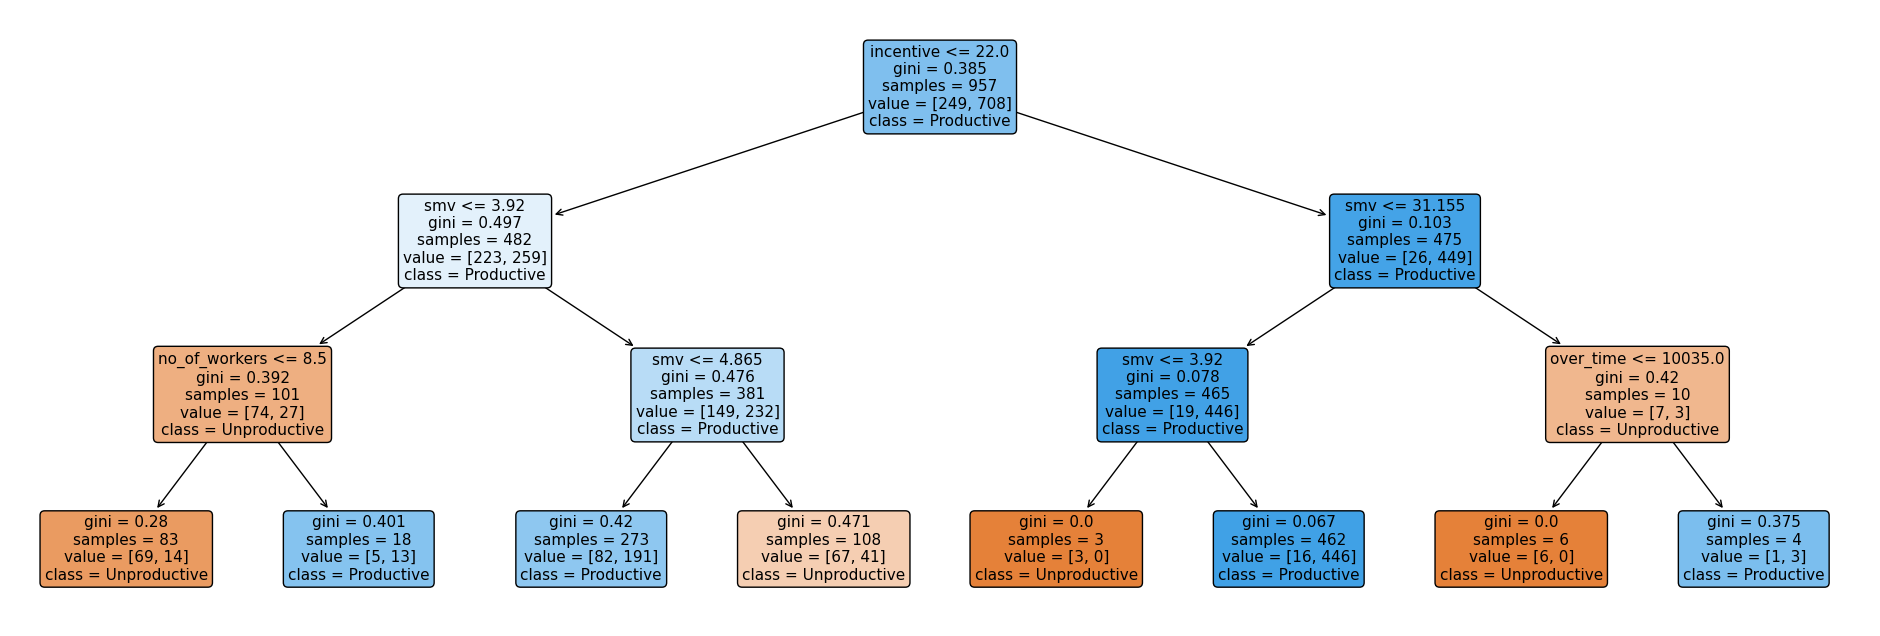

In [52]:
from sklearn.tree import plot_tree

# plotting the tree
plt.figure(figsize=(24.0, 8.0))

_ = plot_tree(tree_clf,
              feature_names = X.columns,
              class_names = ["Unproductive", "Productive"],
              filled = True,
              rounded = True,
              proportion = False,
              fontsize = 11)

plt.show()

As a root we have the threshold on incentive (<= 22.0). This threshold divides the data in half and the next threshold depends on the time allocated to a task. This threshold progressively divide the dataset into more homogeneous subsets.

It's important to remember that we pruned the tree when we instantiated the model. We restricted it to only feature a maximum depth of three levels to avoiding overfitting. If we hadn't, it's likely we would've seen other columns further dividing the dataset.

Let me explain how the computed tree works. For example, we have an observation where the `incentive` value is 10. This means that the root threshold ends with a false result and we go to the left part of the tree. Then we look at the `smv` values and the observation has the value of it equal to 4. Now we move to the right child node of 1 level of the tree. Here again we check the value of `smv` and because 4 is less than 4.865 we end in the left leaf with the class `Productive`.

As we set the maximum depth of the tree we don't have any other columns and now we will use the `GridSearchCV` function to find the best tree. Let's consider the following parameters:
* criterion: `gini`, `entropy` and `log_loss`,
* class_weight: `None` and `balanced`,
* max_depth: range from 3 to 10 inclusive.

In [53]:
from sklearn.model_selection import GridSearchCV

# dict of the parameters to be considered
parameters = {'criterion': ['gini', 'entropy', 'log_loss'],
             'class_weight':[None, 'balanced'],
             'max_depth':list(range(3,10))}

# calling GridSearchCV instance
grid_recall = GridSearchCV(DecisionTreeClassifier(random_state=123),
                           param_grid=parameters,
                           n_jobs=2,
                           scoring='accuracy')

# fitting to the data
grid_recall.fit(X, y)

# collecting best paramas and score
best_params = grid_recall.best_params_
best_score = grid_recall.best_score_

In [54]:
best_params

{'class_weight': None, 'criterion': 'gini', 'max_depth': 4}

In [55]:
round(best_score, 2)

0.81

As we see the GridSearch find the tree with params: `class_weight`: `None`, `criterion`: `"gini"` and `max_depth`: `4` with score 0.81. This is worse result than for our first tree. Now let's consider how our first tree performing during cross-validation.

## Cross-Validation

In [56]:
from sklearn.model_selection import cross_validate

# cross-validation
multiple_cross_scores = cross_validate(tree_clf, X, y, cv = 10, scoring= ("accuracy", "precision", "recall", "f1"))

In [57]:
# getting average metrics
mean_acc = multiple_cross_scores['test_accuracy'].mean().round(2)
mean_pre = multiple_cross_scores['test_precision'].mean().round(2)
mean_rec = multiple_cross_scores['test_recall'].mean().round(2)
mean_f1 = multiple_cross_scores['test_f1'].mean().round(2)

pd.DataFrame({'Accuracy':[accuracy_tree1, mean_acc],
              'Precision':[precision_tree1, mean_pre],
              'Recall':[recall_tree1, mean_rec],
              'F1-Score':[f1_tree1, mean_f1]},
             index=['tree1', 'cross-val'])

,Accuracy,Precision,Recall,F1-Score
tree1,0.85,0.89,0.92,0.90
cross-val,0.82,0.85,0.92,0.88


As we can see, the metrics are very good even with cross-validation. We can assume that our model is resistant to over-fitting.

Our last consideration is the random forest method, which can be better than the performance of the decision trees.

## The Random Forest

In [58]:
from sklearn.ensemble import RandomForestClassifier

# building the model
rand_for_clf = RandomForestClassifier(max_depth=3, oob_score=True, n_estimators = 100, random_state=123)

# fitting model to the train set
rand_for_clf.fit(X_train, y_train)

# predicting values on the test set
y_pred = rand_for_clf.predict(X_test)

# oob score
rand_oob = rand_for_clf.oob_score_
rand_oob

0.7941483803552769

In [59]:
# calculating metrics

# accuracy
rand_acc = round(accuracy_score(y_test, y_pred),2)

# Precision
rand_pre = round(precision_score(y_test, y_pred),2)

# Recall
rand_rec = round(recall_score(y_test, y_pred),2)

# F1-Score
rand_f1 = round(f1_score(y_test, y_pred),2)

pd.DataFrame({'Accuracy':[accuracy_tree1, rand_acc],
              'Precision':[precision_tree1, rand_pre],
              'Recall':[recall_tree1, rand_rec],
              'F1-Score':[f1_tree1, rand_f1]},
             index=['tree1', 'random forest'])

,Accuracy,Precision,Recall,F1-Score
tree1,0.85,0.89,0.92,0.90
random forest,0.79,0.81,0.96,0.88


The table above shows us that the Decission Tree Classifier has better performance than Random Forest Classifier. Nevertheless the second method has quite well performence and have better Recall metric which means it better predict correct values.

## Conclusion

In this type of project, where we want to predict employee productivity, the best solution is to use Decision Tree Classifier. It has a better performance than Random Forest Classification. We can consider using more hyperparameters and compare Decision Tree with other machine learning methods like Logistic or Linear Regression, Decision Tree Regressor, Random Forest Regressor.

During this project I learnt one of the most important things. The data exploration, cleaning and preprocessing part of the project is the most important part. We can discover many patterns, relationships, errors there and then we can build good models.